# **Video Annotation and Object Detection**

# 🎥 **Introduction to Video Annotation**

---

#### 🧠 **What is Video Annotation?**

**Video annotation** is the process of **labeling or tagging objects** in a video frame-by-frame so that **machines (like AI or computer vision models)** can recognize and understand what’s happening in the video.

It’s like teaching a computer to “see” what we see!

---

#### 🤔 Why Do We Need Video Annotation?

Imagine training a self-driving car 🚗. It must recognize:

* People crossing the road 👨‍🦯
* Other cars 🚘
* Traffic lights 🚦

To do this, the car’s AI needs **thousands of videos** with **labeled objects** so it can learn what’s what.

Video annotation helps in:

* **Object detection & tracking** 📦🔁
* **Action recognition** (e.g., walking, jumping) 🏃
* **Behavior analysis** (e.g., crowd movement) 👥

---

#### 🧰 Types of Video Annotation

1. **Bounding Box Annotation**

   * Drawing rectangles around moving objects in each frame
   * Example: Tracking a cat 🐈 across a garden

2. **Polygon Annotation**

   * Precise outlining of objects (better than rectangles)
   * Example: Drawing around the shape of a car 🚙

3. **Keypoint Annotation**

   * Marking joints or points (like elbows, knees)
   * Used in motion detection or human posture analysis

4. **Semantic Segmentation**

   * Coloring each pixel based on object class
   * Used in advanced image/video understanding

5. **Skeletal Tracking**

   * Tracking human body structure
   * Used in sports, AR/VR, or gesture recognition

---

#### 🔄 Frame-by-Frame vs Interpolation

* **Frame-by-Frame**: Annotating every frame (accurate but time-consuming)
* **Interpolation**: Annotating some keyframes and letting software guess the in-between (faster but needs correction)

---

#### 🧪 Real-Life Applications

| Field                   | Use Case                             |
| ----------------------- | ------------------------------------ |
| **Autonomous Vehicles** | Object detection, lane recognition   |
| **Healthcare**          | Human movement analysis              |
| **Retail**              | Customer movement tracking in stores |
| **Security**            | Suspicious activity recognition      |
| **Sports**              | Player tracking, action review       |

---

#### 🛠 Tools for Video Annotation

Some popular tools:

* **CVAT (Computer Vision Annotation Tool)**
* **Labelbox**
* **VGG Image Annotator (VIA)**
* **MakeSense.ai**
* **SuperAnnotate**

---


In [16]:
!pip install numpy==1.23.5 opencv-contrib-python==4.5.5.64

Defaulting to user installation because normal site-packages is not writeable


In [17]:

%pip install yt-dlp -q
# !apt-get install -y ffmpeg -qq
!pip install yt-dlp
!pip install opencv-python
!pip install opencv-contrib-python



# Imports required packages
import os
import cv2
import glob
import time
import yt_dlp
import shutil
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, YouTubeVideo



Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [18]:
# Create folders
os.makedirs("downloads", exist_ok=True)
os.makedirs("frames", exist_ok=True)
os.makedirs("tracked_frames", exist_ok=True)

🔧 3. Manual Frame-by-Frame Annotation (Intro Task)

# [Download test Video that you can upload](https://drive.google.com/file/d/10NXykZjooXfpqny0uL2SRdA_rrDr03_W/view?usp=sharing)

or directly load from youtube link

In [19]:
print("\nDownloading sample video from YouTube...")
url = "https://www.youtube.com/watch?v=3kO21UGpCNw"

ydl_opts = {
    'format': 'mp4[height<=360]',
    'outtmpl': 'downloads/sample_video.%(ext)s',
    'quiet': True
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])

video_path = "downloads/sample_video.mp4"
print("Downloaded video to:", video_path)

Downloaded video to: downloads/sample_video.mp4


📌 4. Tracking with OpenCV Built-in Trackers

EXTRACT FRAMES

In [20]:
cap = cv2.VideoCapture(video_path)
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imwrite(f"frames/frame_{frame_count:03d}.jpg", frame)
    frame_count += 1
cap.release()
print(f"Extracted {frame_count} frames to /frames")

Extracted 2054 frames to /frames


Optional: Preview First 5 Frames





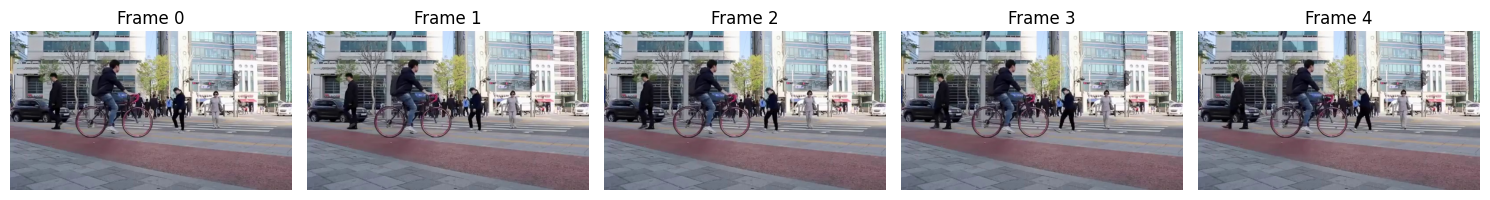

In [21]:
import matplotlib.pyplot as plt
import glob
import cv2

frame_list = sorted(glob.glob('frames/*.jpg'))[:5]

plt.figure(figsize=(15,3))
for i, path in enumerate(frame_list):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"Frame {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()


SHOW FIRST FRAME (UI)

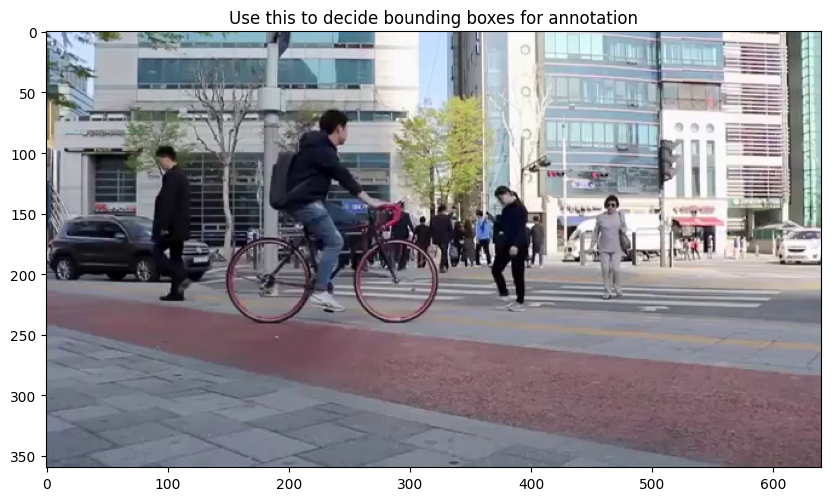

In [22]:
first_frame = cv2.imread("frames/frame_000.jpg")
frame_rgb = cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.title("Use this to decide bounding boxes for annotation")
plt.axis('on')
plt.show()


🏁 Exercise 1: Track a person in a video

Use CSRT or KCF tracker.

Observe performance on scale change or partial occlusion.

🧱 Exercise 2: Multi-Object Tracking with OpenCV

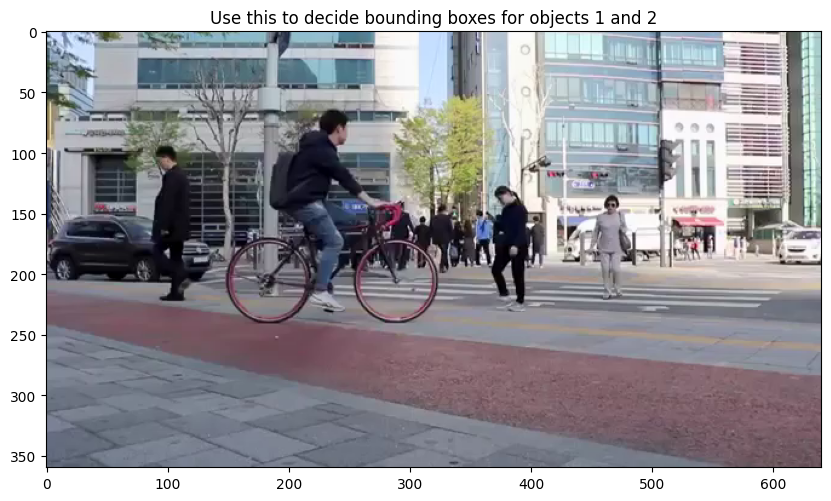

In [23]:
import cv2
import matplotlib.pyplot as plt

video_path = "downloads/sample_video.mp4"  # set this to your uploaded or downloaded video
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.title("Use this to decide bounding boxes for objects 1 and 2")
plt.axis('on')
plt.show()

🔹 2. Manually input 2 bounding boxes

In [24]:
bboxes = [(50, 60, 100, 200), (350, 100, 80, 150)]

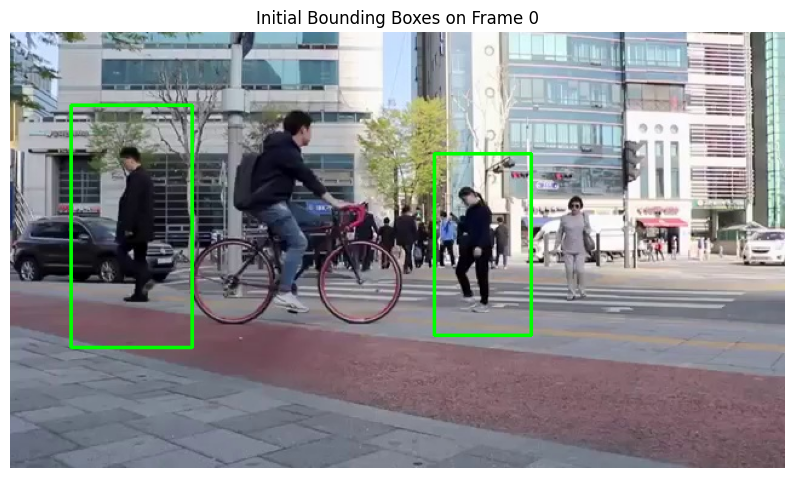

In [25]:
# Load the first frame
first_frame_path = "frames/frame_000.jpg"
frame = cv2.imread(first_frame_path)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Draw the bounding boxes
for bbox in bboxes:
    x, y, w, h = bbox
    cv2.rectangle(frame_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the image with bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.title("Initial Bounding Boxes on Frame 0")
plt.axis("off")
plt.show()


🔹 3. Initialize Multi-Object Tracker

In [26]:
# Open video
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if not ret:
    raise Exception("Could not read video")

# Tracker type
tracker_type = "CSRT"

# Create MultiTracker
multi_tracker = cv2.legacy.MultiTracker_create()

# Add trackers
for bbox in bboxes:
    if tracker_type == "CSRT":
        tracker = cv2.legacy.TrackerCSRT_create()
    elif tracker_type == "KCF":
        tracker = cv2.legacy.TrackerKCF_create()
    else:
        raise ValueError("Unsupported tracker type")
    multi_tracker.add(tracker, frame, bbox)

print("Multi-tracker initialized successfully with", tracker_type)

Multi-tracker initialized successfully with CSRT


🔹 4. Run tracking and show using matplotlib

In [27]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 1)
frame_idx = 1

while True:
    ret, frame = cap.read()
    if not ret:
        break

    success, boxes = multi_tracker.update(frame)
    for box in boxes:
        x, y, w, h = map(int, box)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imwrite(f"tracked_frames/frame_{frame_idx:03d}.jpg", frame)
    frame_idx += 1

cap.release()
print("Saved tracked frames to /tracked_frames")


Saved tracked frames to /tracked_frames


In [28]:
frame_files = sorted(glob.glob("tracked_frames/frame_*.jpg"))
if len(frame_files) == 0:
    raise RuntimeError("No tracked frames found!")

frame_sample = cv2.imread(frame_files[0])
h, w, _ = frame_sample.shape

out = cv2.VideoWriter("tracked_output.avi", cv2.VideoWriter_fourcc(*'XVID'), 20, (w, h))
for f in frame_files:
    frame = cv2.imread(f)
    out.write(frame)
out.release()
print("Exported tracked video: tracked_output.avi")

Exported tracked video: tracked_output.avi


📦 Download Annotated Results (Optional)

### 📦 Download Annotated Results (Optional)

```python
import shutil
shutil.make_archive('frames', 'zip', 'frames')
files.download("frames.zip")
```

---

DOWNLOAD RESULTS (ZIP)

In [31]:
# shutil.make_archive("tracked_frames", 'zip', 'tracked_frames')

# files.download("tracked_frames.zip")
# files.download("tracked_output.avi")

## 🧠 How It Works: Bounding Box Tracing in OpenCV Trackers

When you enter a bounding box like:

```
(50, 80, 100, 200)
```

you're telling OpenCV:

> “This is the region of the person/object in **frame 0**. Now follow that object across all remaining frames.”

---

## ✅ Here's What Happens Internally:

### 1. **Tracker Initialization**

```python
tracker = cv2.legacy.TrackerKCF_create()
tracker.init(frame_0, bbox)
```

* It "remembers" the **object's appearance** from the initial box.
* KCF, CSRT, or other trackers use that region’s **features** (edges, gradients, patterns).

---

### 2. **Frame-by-Frame Update**

```python
success, box = tracker.update(next_frame)
```

* It tries to **match the appearance** of the object in the next frame.
* Based on:

  * **Texture/feature similarity**
  * **Motion prediction** (where it moved)
  * **Scale change estimation** (did it zoom in/out?)

---

### 3. **Drawing the Updated Box**

```python
cv2.rectangle(frame, (x, y), (x + w, y + h), color, thickness)
```

Each frame shows a box **following the object**, based on where the tracker thinks the object moved.

---

## 🎯 Real-World Analogy

Imagine you pointed at someone wearing red and said:

> “Follow that red-shirt person across the video.”

The tracker looks at pixel features (like the red shirt) and tries to match those features in every new frame.

---

## 📦 Example with Person Tracking

If you input:

```
bbox1 = (120, 80, 70, 180)  # a person on the left
```

Then KCF/CSRT tries to:

* **Match the person's features** in the next frame
* **Draw a new box** in the updated location

It will try to **maintain the lock** on that person even if:

* The person moves
* The camera pans
* There's partial occlusion (e.g., someone walks in front)

---

## 🧪 Tracking Accuracy

| Tracker  | Handles scale | Occlusion | Accuracy             |
| -------- | ------------- | --------- | -------------------- |
| **CSRT** | ✅ Better      | ✅ Decent  | 🔍 More accurate     |
| **KCF**  | ❌ Weak        | ❌ Weak    | ⚡ Faster but simpler |

---

## 🔎 Visual Debug Tips

You can visually **confirm the tracking is on the person** by:

* Saving tracked frames
* Playing back the `tracked_output.avi` you generated
* Watching if the green box stays on the person across motion

---

## 🚀 Want More Accurate Tracking?

If OpenCV trackers aren't working well enough:

* Try **YOLO + DeepSORT**
* Or use **MediaPipe / Detectron2** for better human-specific tracking




---

### 🔓 7. Open Source Annotation Tools (Optional Demos)

#### ✅ [Label Studio](https://labelstud.io/)

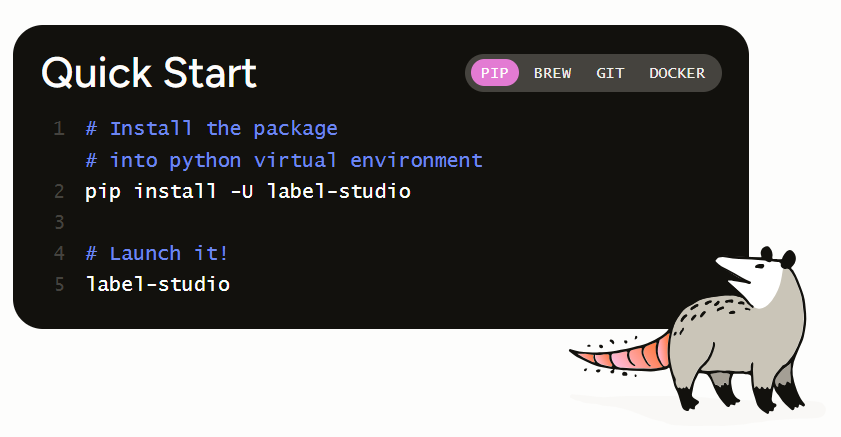

```markdown
- Can be used for video object annotation
- Cloud hosted or local Docker install
- Supports bounding boxes, polygons, and more
```

#### ✅ [VOTT (Microsoft)](https://github.com/microsoft/VoTT)

```markdown
- Easy UI for video annotation
- Exports to YOLO, Pascal VOC, etc.
```

#### ✅ [CVAT](https://github.com/opencv/cvat)

```markdown
- Enterprise-grade annotation tool
- Supports complex tracking, interpolation, labeling
```

---


